# Data Project - Stock Market Analysis 

![techAnalysis-1000x500.jpg](attachment:techAnalysis-1000x500.jpg)

# New Section

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [2]:
# !pip install -q hvplot
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install -q yfinance

     |████████████████████████████████| 6.4 MB 8.1 MB/s 
     |████████████████████████████████| 62 kB 817 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [4]:
# The tech stocks we'll use for this analysis
comp_list = ['F', 'AAL', 'UAL', 'TSLA']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in comp_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [5]:
# for company, company_name in zip(company_list, tech_list):
#     company["company_name"] = company_name

In [6]:
company_list = [F, AAL, UAL, TSLA]
company_name = ["FORD", "AMERICAN", "UNITED", "TESLA"]

for company, comp_name in zip(company_list, company_name):
    company["company_name"] = comp_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-29,691.500000,693.520020,666.820007,685.469971,685.469971,27632400,TESLA
2022-06-30,673.530029,688.369995,656.590027,673.419983,673.419983,31533500,TESLA
2022-07-01,681.000000,690.690002,666.359985,681.789978,681.789978,24781500,TESLA
2022-07-05,669.000000,699.440002,648.500000,699.200012,699.200012,28193700,TESLA
2022-07-06,692.340027,703.690002,681.559998,695.200012,695.200012,23951200,TESLA
2022-07-07,701.760010,736.090027,696.630005,733.630005,733.630005,27310200,TESLA
2022-07-08,727.000000,764.940002,723.479980,752.289978,752.289978,33343700,TESLA
2022-07-11,756.309998,759.190002,700.880005,703.030029,703.030029,33080400,TESLA
2022-07-12,710.539978,719.320007,685.109985,699.210022,699.210022,29310300,TESLA


In [7]:
# Summary Stats
TSLA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,867.825692,888.488218,845.410199,866.827348,866.827348,2.565650e+07
std,159.496805,163.688473,152.758865,158.201124,158.201124,8.988128e+06
min,623.849976,647.200012,620.570007,628.159973,628.159973,9.800600e+06
25%,723.710022,740.969971,708.849976,724.369995,724.369995,1.946450e+07
50%,849.099976,866.140015,822.349976,843.030029,843.030029,2.453830e+07
75%,1006.799988,1034.849976,982.530029,1009.010010,1009.010010,3.071310e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


In [8]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-07-13 to 2022-07-13
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


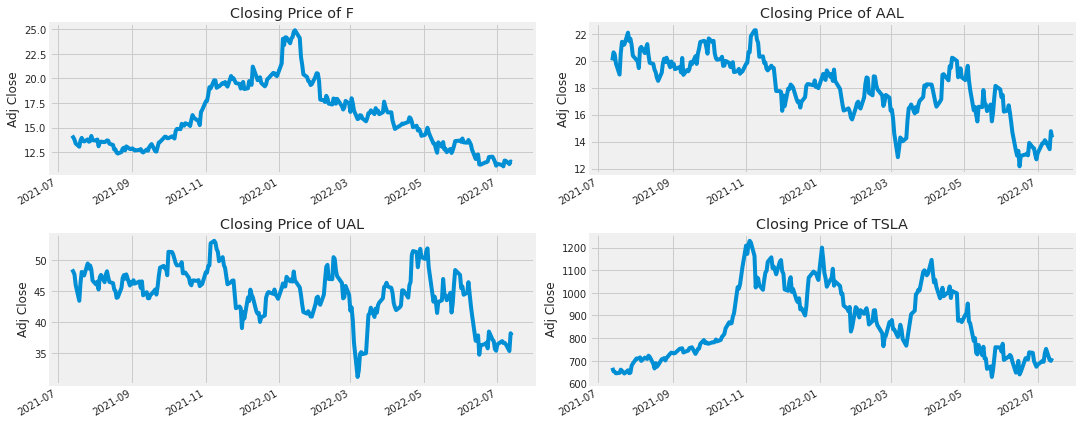

In [10]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {comp_list[i - 1]}")
    
plt.tight_layout()

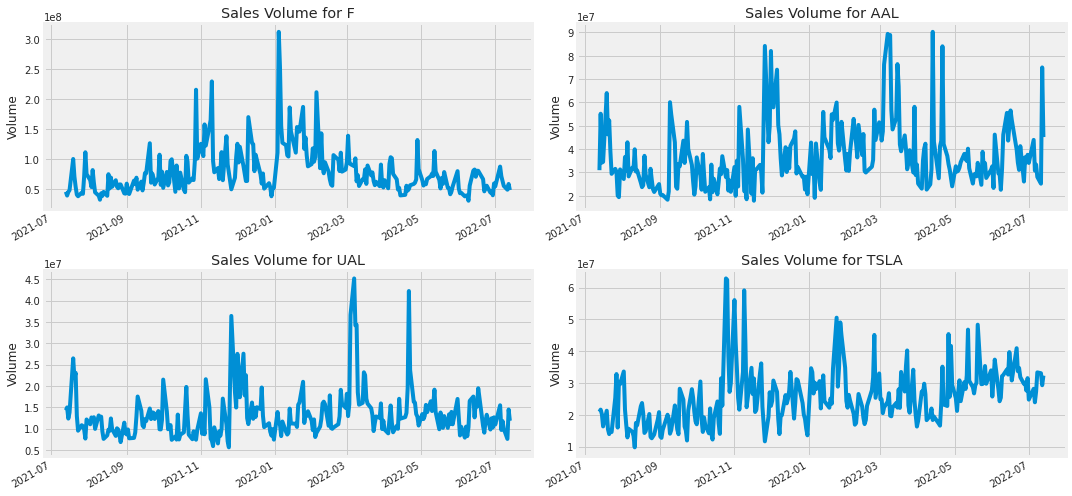

In [12]:
# Now let's plot the total volume of stock being traded each day

plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {comp_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [13]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [ ]:
# print(GOOG.columns)

Now let's go ahead and plot all the additional Moving Averages

In [ ]:
# df.groupby("company_name").hist(figsize=(12, 12));

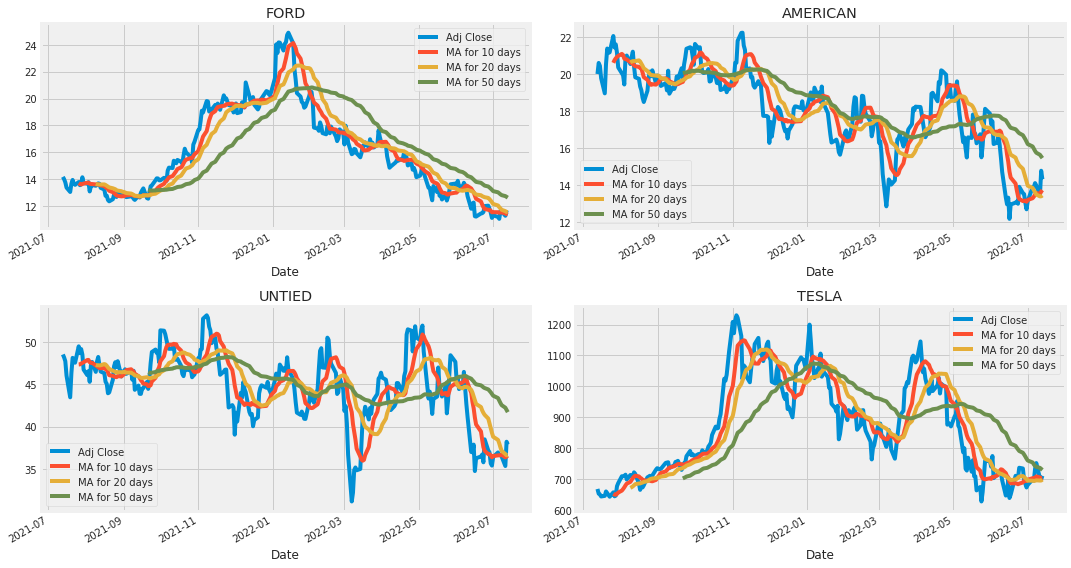

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

F[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('FORD')

AAL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('AMERICAN')

UAL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('UNTIED')

TSLA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TESLA')

fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

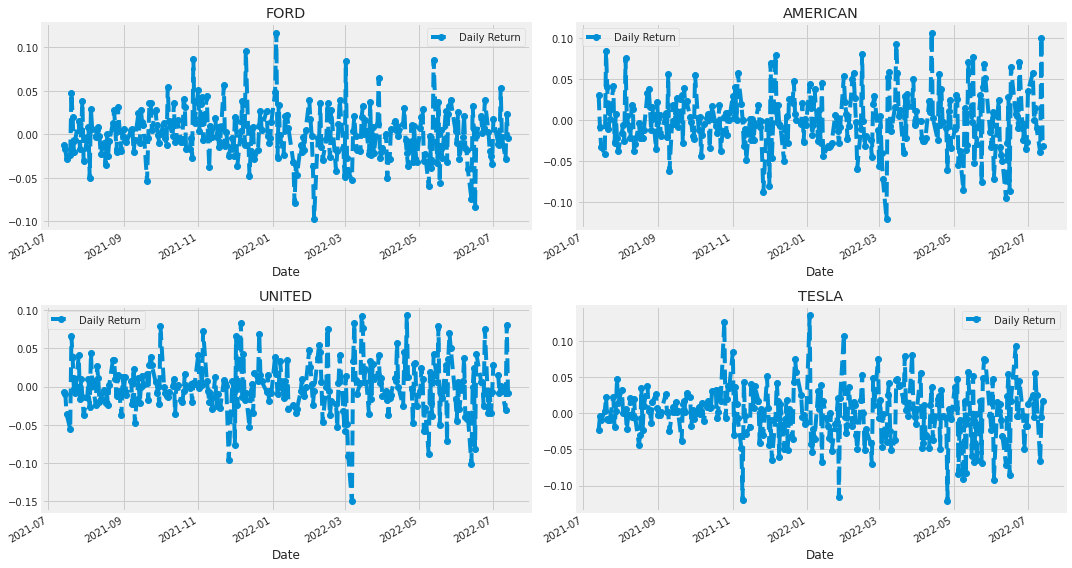

In [15]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

F['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('FORD')

AAL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('AMERICAN')

UAL['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('UNITED')

TSLA['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TESLA')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

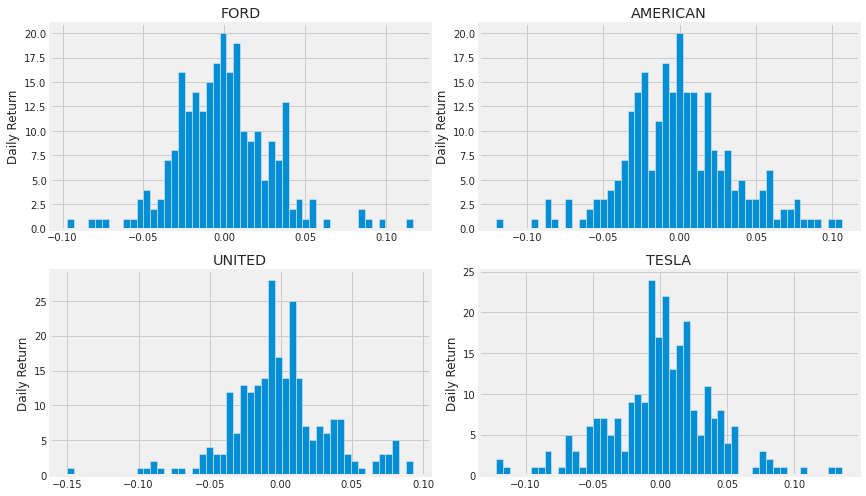

In [16]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()